# Working with curves in 2D
---

This script should help you improve you runderstanding
of how we represent 2D parametric curves, we will be 
using parametric equations to represent light rays, so
its essential to have a very clear understanding of
how parametric lines work.

F. Estrada - CSC D18 - Computer Graphics, Sep. 2019

---

*Note: This notebook uses a [matlab kernel for Jupyter](https://github.com/Calysto/matlab_kernel). For detailed installation, please use the documentation given at the link. Here's a quick overview:*
```
cd <matlabroot>/extern/engines/python
python3 setup.py install
pip3 install matlab_kernel
```
`matlabroot` is the root of the MATLAB installation on your computer. Usually, it's `/usr/local/MATLAB/2018b/` (or whatever version you have).

---

## Explicit form of a line
---

$$y = mx + b$$

where

- $m$ is the slope of the line (from $-\infty$ to $\infty$)

- $b$ is the height at which the line crosses the $Y$ axis

In [1]:
m = 2.5;  b = 1;

We'll use a for loop to get points along the line - lines in computer graphics are never actually continuous! they are made of lots of individual points we plot together - they're close enough they look like one continuous shape - same thing for any other curve.

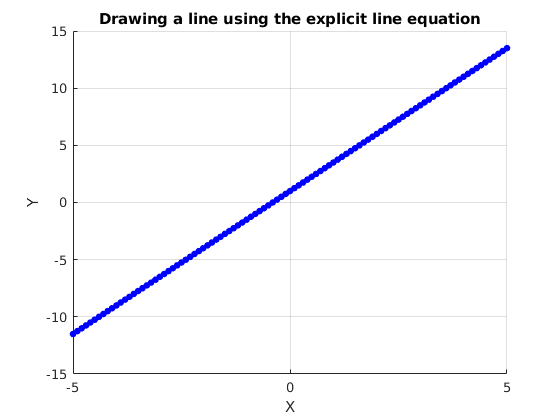

In [2]:
%plot inline

hold on;  % Will plot everything on the same figure till `hold off`
grid on;  % Shows a grid

% Always put a title and axis labels on our figures!
title('Drawing a line using the explicit line equation');
xlabel('X'); ylabel('Y');

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% A for loop from -5 to 5, with an increment of 0.1:
for x=-5:.1:5   

 y = (m*x) + b;
 
 % Plot a point at (x,y) where y is given by the line equation.
 plot(x,y,'.','color',[0 0 1],'markersize',15);     

end; % All blocks of code end with this in matlab (for, if, etc)

Now try drawing a line with a much steeper slope (e.g. $m=50$ or $m=100$). What happens?

Something *simple* like drawing a line in 2D using a line equation, can be tricky - what increment should we use in our for loop? Can we digure out the optimal value from the slope? 

Using the current setup, can we draw a perfectly vertical line with this equation?

---
## Parametric form of a line
---

$$ l(\lambda) = p_0 + \lambda * d_0 $$

where

- $\lambda$ is the parameter
- $p_0$ is a point on the line
- $d_0$ is a **unit length** vector in the direction of the line

In [3]:
p_0 = [2.5, 1.5];     % A 2D point, the line will pass through (2.5, 1.5)
    
d_0 = [1.0, 2.5];     % For each unit along x, y changes by 2.5 (which is the slope).
                      % Note that this direction vector is NOT yet unit length.
                    
d_0 = d_0 / norm(d_0);  % Normalize the direction vector to make it unit length!

We'll once again use a for loop here to plot the line, however we will be iterating over values for the parameter $\lambda$.

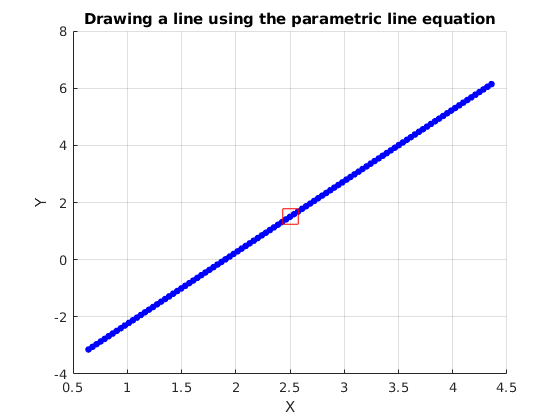

In [4]:
% plot inline

hold on; grid on;
title('Drawing a line using the parametric line equation');
xlabel('X'); ylabel('Y');

for lambda=-5:.1:5  
   p = p_0 + (lambda * d_0);           % This gives us a point (2 coordinates X,Y)
   
   % Indexing into vectors and matrices starts at 1, like in math!
   plot(p(1),p(2),'.','color',[0 0 1],'markersize',15);     
   
end;   

plot(p_0(1),p_0(2),'s','color',[1 0 0],'markersize',15);    % Show where p_0 is on the line plot!

With the parametric equation, it's easier to plot lines with different slopes - the increment on the `for` loop doesn't need to change because of the orientation of the line! points are equally spaced regardless.

- Now, you can easily plot a vertical line! (what's the value for $d_0$)?
- You can also easily have the line pass through any given point in the 2D plane
- This representation is so convenient, it's used in most rendering applications to represent light rays (both in 2D and later on in 3D as well!) 
- One more advantage is that the representation is the same in 3D, only now the vectors and points have 3 entries instead of 2

---
### Question:

How do we plot the line that passes through two points:
     $$p_0 = [2.5, -1.5]$$
     $$p_1 = [5.75,  2.25]$$

Find out the line's parametric equation and plot it!

---
## Parametric form of circle
---

$$c(\lambda) = [r \cdot cos(2\pi\lambda), r \cdot sin(2\pi\lambda)]$$
$$ \textit{or} $$
$$x(\lambda) = r \cdot cos(2\pi\lambda)$$
$$y(\lambda) = r \cdot sin(2\pi\lambda)$$

where

- $\lambda$ is the parameter and goes from 0 to 1 to plot a full circle
- $r$ is the circle's radius. 

In [5]:
r = 3;  % Radius

Once again, we can loop over values for the parameter and plot the points. Here, we will also want to enforce that matlab scales the axes equally, otherwise our circle will look more like an ellipse.

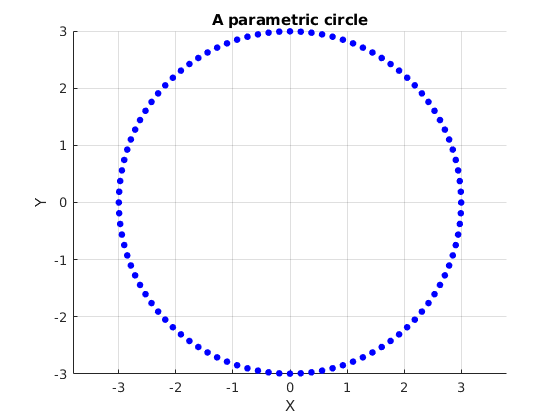

In [6]:
% plot inline

hold on; grid on;
title('A parametric circle');
xlabel('X'); ylabel('Y');

for lambda=0:.01:1
    c_l = [r*sin(2*pi*lambda), r*cos(2*pi*lambda)];
         
    plot(c_l(1),c_l(2),'.','color',[0 0 1],'markersize',15);
end;

axis equal; % Scale axes equally

---
## Parametric form of an ellipse
---

Ellipses are very easily done - in parametric form! it's just a matter of asking for different scales for the $x$ and $y$ coordinates but otherwise the same form as the circle is used. Looking at it in a different way, a parametric circle is a special case of the parametric ellipse where both coordinates are scaled equally.

$$e(\lambda) = [a\cdot cos(2\pi\lambda), b\cdot sin(2\pi\lambda)]$$
$$ \textit{or} $$
$$x(\lambda) = a \cdot cos(2\pi\lambda)$$
$$y(\lambda) = b \cdot sin(2\pi\lambda)$$

where
- $\lambda$ is the parameter and goes from 0 to 1 to plot a full ellipse
- $a$ and $b$ are the scales for the $x$ and $y$ axis respectively.

In [7]:
a = 3;  b = 0.5;

... and you know how to do the rest by now!

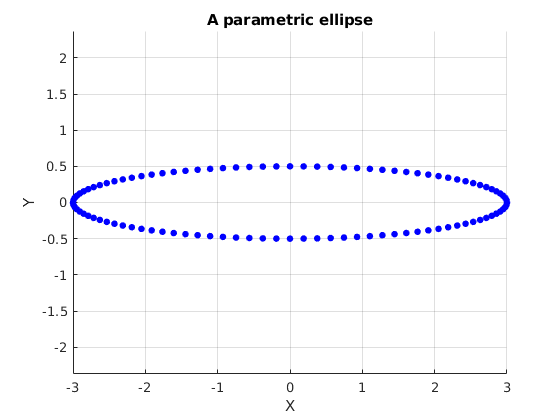

In [8]:
%plot inline

hold on; grid on; axis equal;
title('A parametric ellipse');
xlabel('X'); ylabel('Y');


for lambda=0:.01:1
    e_l = [a*sin(2*pi*lambda), b*cos(2*pi*lambda)];
         
    plot(e_l(1),e_l(2),'.','color',[0 0 1],'markersize',15);
end;

Bottom line - parametric equations are very powerful, fairly easy to handle, and allow us to easily plot all kinds of 2D curves!

---

## Let's play!
---
### Exercise 1
---
Figure out the parametric equations for an ELLIPTIC SPIRAL, that is, a spiral that starts small and grows as you move around the curve (or starts big and shrinks, it's up to you). You should have your elliptic spiral do several turns so we can see what it looks like.

Think about the parameters in the equations above and how you can use them, and ask your TA if you have an idea but want a bit of help, or show your spiral!

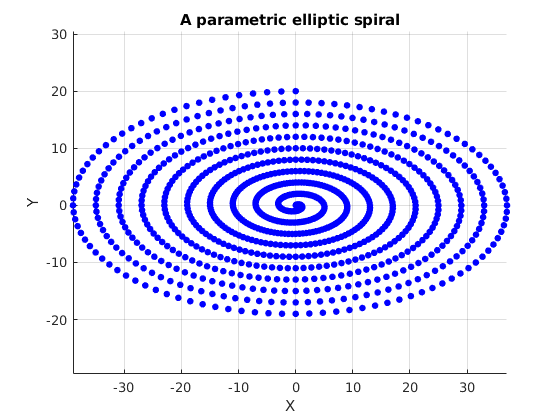

In [9]:
%plot inline

hold on; grid on; axis equal;
title('A parametric elliptic spiral');
xlabel('X'); ylabel('Y');

% TODO: finish this!

---
### Exercise 2
---

Draw a set of radially symmetric lines (lines starting at the origin, leaving at equally-spaced angles). The number of lines should be selectable.

For instance, if I want $5$ lines, then your plot should have $5$ lines leaving the origin, each line is $\frac{360}{5}^\circ$ away from its neighbours.

You should think of using appropriate parametric forms for getting the information you need to plot these lines.


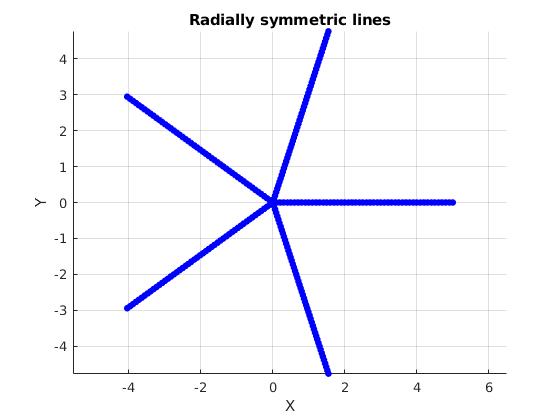

In [10]:
%plot inline

hold on; grid on; axis equal;
title('Radially symmetric lines');
xlabel('X'); ylabel('Y');

N = 5;

% TODO: finish this!

---
### Exercise 3
---

Draw a star with a specific number of arms. Think about how you can use what you developed for exercise 2 to your advantage!

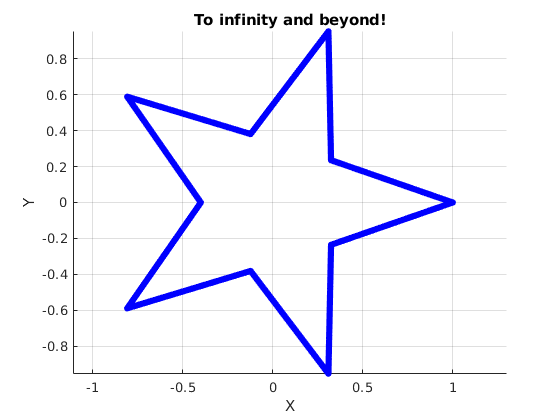

In [11]:
%plot inline

hold on; grid on; axis equal;
title('To infinity and beyond!');
xlabel('X'); ylabel('Y');

N = 5;

% TODO: finish this!